# Image Processing CookBook
## Chapter 05
### Author: Sandipan Dey

### Image Alignment with ECC algorithm

992 610


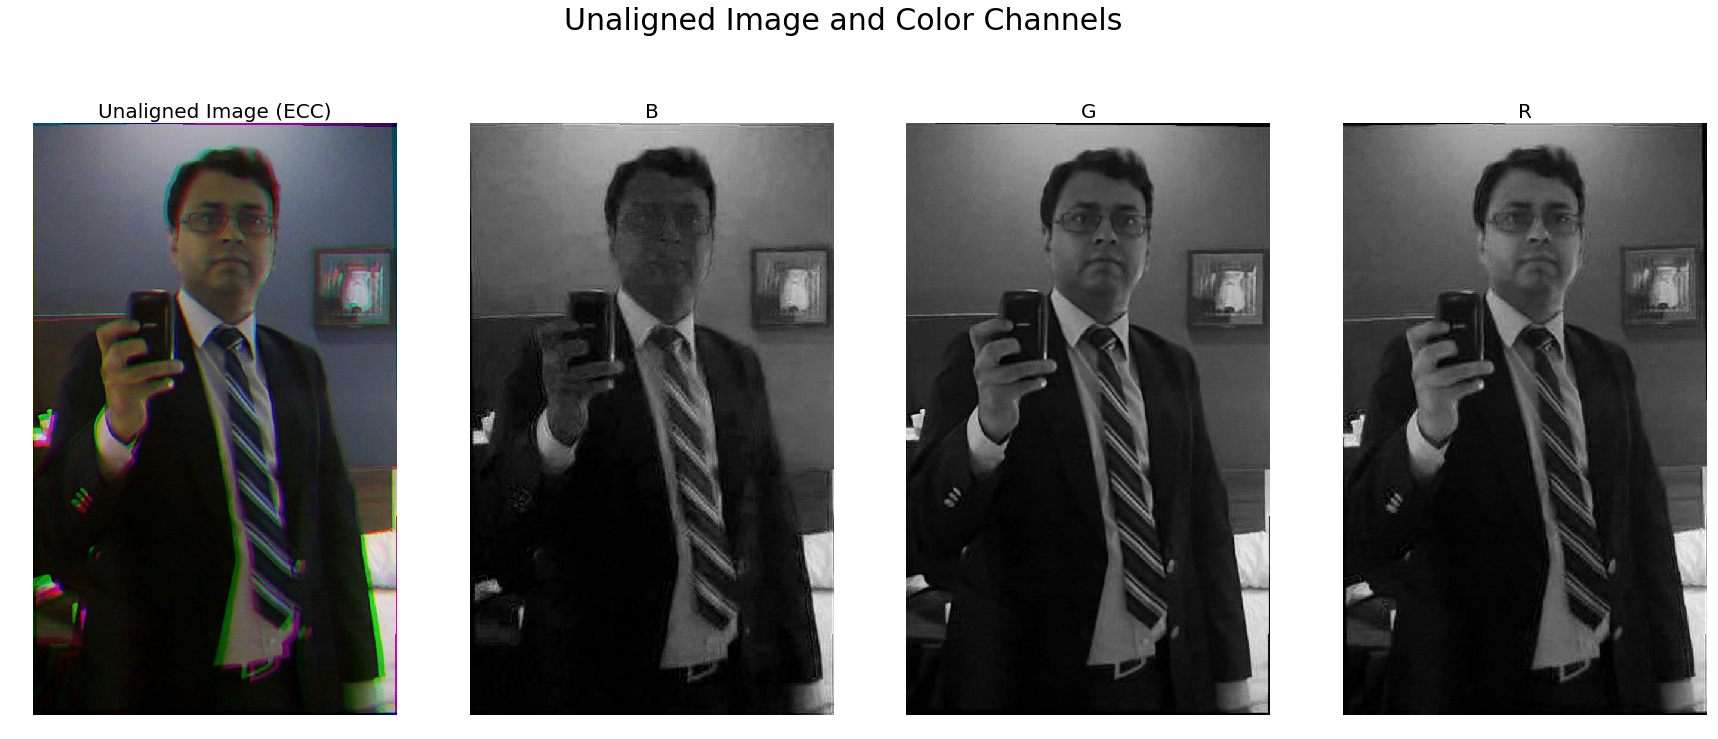

Processing Channel B...
[[ 9.9852240e-01 -7.3300595e-03  8.7293777e+00]
 [ 1.3443469e-02  9.9930155e-01 -3.7745864e+00]
 [-3.5765074e-06  2.5245824e-06  1.0000000e+00]]
Processing Channel G...
[[ 1.0092515e+00 -2.7040454e-02  8.6985931e+00]
 [ 2.6736395e-02  9.8989981e-01 -5.0035219e+00]
 [-6.7387623e-07  5.9878818e-07  1.0000000e+00]]


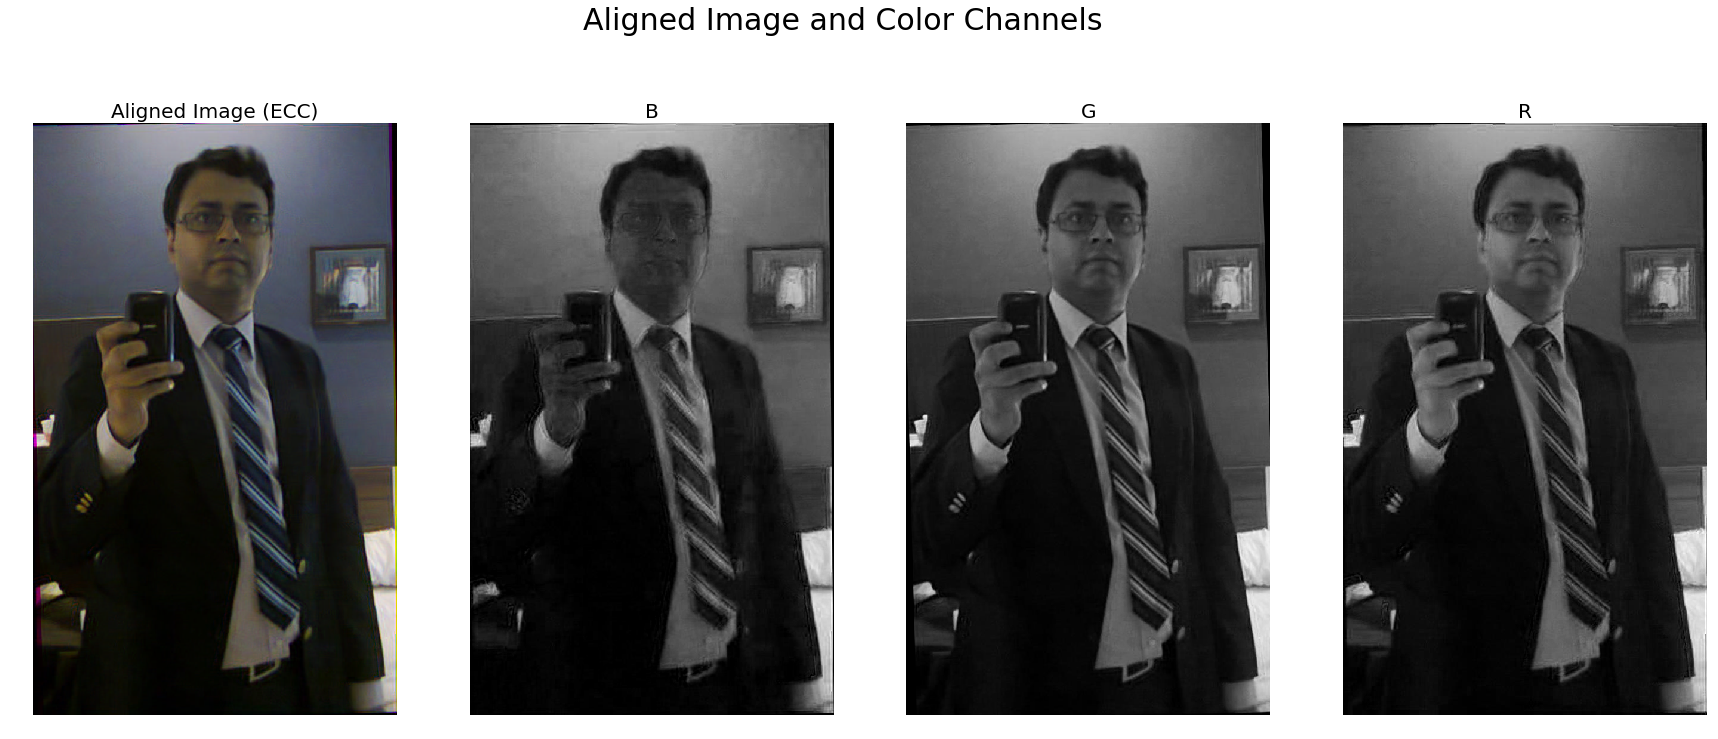

True

In [1]:
% matplotlib inline
import cv2
import numpy as np
import matplotlib.pylab as plt
 
def get_gradient(im) :
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad

im_unaligned =  cv2.imread("images/me_unaligned.jpg")

height, width = im_unaligned.shape[:2]
print(height, width)

channels = ['B', 'G', 'R']

plt.figure(figsize=(30,12))
plt.gray()
plt.subplot(1,4,1), plt.imshow(cv2.cvtColor(im_unaligned, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Unaligned Image', size=20)
for i in range(3):
    plt.subplot(1,4,i+2), plt.imshow(im_unaligned[...,i]), plt.axis('off'), plt.title(channels[i], size=20)
plt.suptitle('Unaligned Image and Color Channels', size=30)
plt.show()

im_aligned = np.zeros_like(im_unaligned)

# The blue and green channels will be aligned to the red channel.
# So copy the red channel
im_aligned[...,2] = im_unaligned[...,2]

# Define motion model
warp_mode = cv2.MOTION_HOMOGRAPHY

# Set the warp matrix to identity.
warp_matrix = np.eye(3, 3, dtype=np.float32) if warp_mode == cv2.MOTION_HOMOGRAPHY else np.eye(2, 3, dtype=np.float32)

# Set the stopping criteria for the algorithm.
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5000,  1e-10)

im_grad2 = get_gradient(im_unaligned[...,2])

# Warp the blue and green channels to the red channel
for i in range(2) :
    print('Processing Channel {}...'.format(channels[i]))
    (cc, warp_matrix) = cv2.findTransformECC (im_grad2, get_gradient(im_unaligned[...,i]),warp_matrix, warp_mode, criteria)

    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        # Use Perspective warp when the transformation is a Homography
        im_aligned[...,i] = cv2.warpPerspective (im_unaligned[...,i], warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else :
        # Use Affine warp when the transformation is not a Homography
        im_aligned[...,i] = cv2.warpAffine(im_unaligned[...,i], warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
    print (warp_matrix)
    
channels = ['B', 'G', 'R']
plt.figure(figsize=(30,12))
plt.subplot(1,4,1), plt.imshow(cv2.cvtColor(im_aligned, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Aligned Image (ECC)', size=20)
for i in range(3):
    plt.subplot(1,4,i+2), plt.imshow(im_aligned[...,i]), plt.axis('off'), plt.title(channels[i], size=20)
plt.suptitle('Aligned Image and Color Channels', size=30)
plt.show()

cv2.imwrite("images/me_aligned.jpg", im_aligned)